In [ ]:
import sys
sys.path.append("../")
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

from sehec.envs.arenas.simple2d import Simple2D
from sehec.models.TEM.model import TEM

Transition matrix: 
[[0.33333333 0.33333333 0.33333333 0.        ]
 [0.33333333 0.33333333 0.         0.33333333]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.         0.33333333 0.33333333 0.33333333]]
n_states:  4
First sensory observation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Size of g:  120


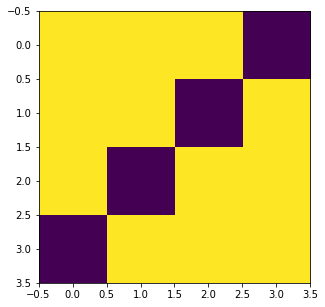

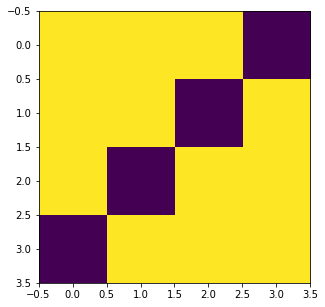

In [2]:
env_name = "env_example"
time_step_size = 1
agent_step_size = 0.2
room_width = 2
room_depth = 2

# Initialise Environment
env = Simple2D(environment_name=env_name,
                room_width=room_width,
                room_depth=room_depth,
                time_step_size=time_step_size,
                agent_step_size=agent_step_size)

discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 25
n_episode = 1
state_density = 1
twoDvalue=True

agent = TEM(discount=discount, t_episode=t_episode, threshold=threshold, lr_td=lr_td,
            room_width=env.room_width, room_depth=env.room_depth, state_density=state_density, twoD=twoDvalue)

In [3]:
total_iters = 0
obs, state = env.reset()
obs = obs[:2]
xs = []
# actions = [[-1,0], [0,1], [-1,0], [0,1], [-1,0]]
for i in range(n_episode):
    # Initialise Environment Batch
    env = Simple2D(environment_name=env_name, room_width=room_width, room_depth=room_depth,
                    time_step_size=time_step_size, agent_step_size=agent_step_size)
    adjs, trans = env.make_environment()
    a_rnn, a_rnn_inv = env.initialise_hebb()
    actions, x, x_, x_two_hot = agent.act(obs)
    # action = actions[j]
    for j in range(t_episode):
        obs, state, reward = env.step(actions[j])
        obs = obs[:2]
    xs.append(xs)
    total_iters += 1

# print(np.shape(x), x_, np.shape(x_two_hot))
env.plot_trajectory()

  0%|          | 0/1 [00:00<?, ?it/s]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.

IndexError: tuple index out of range